In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Data/dataFlight_version_2.csv", index_col=0)
df.head(3).append(df.tail(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,DepDelayMinutes,CRSArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS,Unique_Flight_ID
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,2,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,"Milwaukee, WI",Wisconsin,Orlando International Airport,"Orlando, FL",Florida,-2.0,0.0,1541,0.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0,May,0,671_AirTran Airways Corporation_2009-05-28
2013,2,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,"Grand Junction, CO",Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",Texas,14.0,14.0,1945,-3.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0,Jun,0,3297_Envoy Air - MQ_2013-06-29
2010,3,8,31,2,Delta Airlines,Los Angeles International Airport,"Los Angeles, CA",California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",Michigan,0.0,0.0,2035,-20.0,0.0,0.0,0.0,1.0,1979.0,8,0.0,0.0,0.0,0.0,0.0,Aug,0,1806_Delta Airlines_2010-08-31
2003,4,11,14,5,US Airways Inc.,Charleston International Airport,"Charleston, SC",South Carolina,Charlotte Douglas International Airport,"Charlotte, NC",North Carolina,-6.0,0.0,1319,-11.0,0.0,0.0,0.0,1.0,168.0,1,0.0,0.0,0.0,0.0,0.0,Nov,0,1457_US Airways Inc._2003-11-14
2012,2,5,15,2,Southwest Airlines,Chicago Midway International Airport,"Chicago, IL",Illinois,Nashville International Airport,"Nashville, TN",Tennessee,8.0,8.0,1950,-3.0,0.0,0.0,0.0,1.0,395.0,2,0.0,0.0,0.0,0.0,0.0,May,0,536_Southwest Airlines_2012-05-15
2003,2,4,29,2,United Airlines - UA,Washington Dulles International Airport,"Washington, DC",Virginia,Chicago O'Hare International Airport,"Chicago, IL",Illinois,-5.0,0.0,1724,-14.0,0.0,0.0,0.0,1.0,589.0,3,0.0,0.0,0.0,0.0,0.0,Apr,0,1241_United Airlines - UA_2003-04-29


In [ ]:
df = df.reset_index() # convertir l'index "Year" en colonne

In [ ]:
index_to_drop = df[(df['Cancelled'] == 1) | (df['Diverted'] == 1)].index

# supprimer les lignes
df = df.drop(index_to_drop)

print(df.shape)

(1141468, 30)


In [ ]:
df["ArrDelay"] = df["ArrDelay"].fillna(0)
df.isna().sum()

Year                  0
Quarter               0
Month                 0
DayofMonth            0
DayOfWeek             0
Reporting_Airline     0
Origin                0
OriginCityName        0
OriginStateName       0
Dest                  0
DestCityName          0
DestStateName         0
DepDelay             60
DepDelayMinutes       0
CRSArrTime            0
ArrDelay              0
ArrDelayMinutes       0
Cancelled             0
Diverted              0
Flights               0
Distance              0
DistanceGroup         0
CarrierDelay          0
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
MONTH_AB              0
FLIGHT_STATUS         0
Unique_Flight_ID      0
dtype: int64

In [ ]:
df = df.drop(columns=['Year', 'Quarter', 'OriginCityName', 'OriginStateName', 'DestCityName', 'DestStateName', 'DepDelayMinutes', 'DepDelay',
       'CRSArrTime', 'ArrDelayMinutes', 'Flights', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'MONTH_AB', 'FLIGHT_STATUS', 'Unique_Flight_ID', 'Cancelled', 'Diverted'])

In [ ]:
# Fonction pour déterminer la catégorie de retard en fonction de la valeur de ArrDelay
def categorize_arrdelay(arr_delay):
    if arr_delay <= 15:
        return 0
    elif 16 <= arr_delay <= 60:
        return 1
    else:
        return 2

# Appliquer la fonction de catégorisation à la colonne ArrDelay et créer la nouvelle colonne ArrDelayCategory
df['ArrDelayCategory'] = df['ArrDelay'].apply(categorize_arrdelay)


# Fonction pour déterminer la catégorie du courrier
def categorize_dist(dist):
    if dist <= 311:
        return 0
    elif 311 < dist <= 3107:
        return 1
    else:
        return 2

# Appliquer la fonction de catégorisation à la colonne ArrDelay et créer la nouvelle colonne ArrDelayCategory
df['DistanceCategory'] = df['Distance'].apply(categorize_dist)

In [ ]:
df = df.drop(columns=['ArrDelay', 'Distance', 'DistanceGroup'])

In [ ]:
# Afficher les premières lignes du DataFrame 
df.head(3).append(df.tail(3))

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,ArrDelayCategory,DistanceCategory
0,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,Orlando International Airport,0,1
1,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,Dallas/Fort Worth International Airport,0,1
2,8,31,2,Delta Airlines,Los Angeles International Airport,Detroit Metropolitan Wayne County Airport,0,1
1164838,11,14,5,US Airways Inc.,Charleston International Airport,Charlotte Douglas International Airport,0,0
1164839,5,15,2,Southwest Airlines,Chicago Midway International Airport,Nashville International Airport,0,1
1164840,4,29,2,United Airlines - UA,Washington Dulles International Airport,Chicago O'Hare International Airport,0,1


In [ ]:
# Compter le nombre de records pour chaque catégorie dans la colonne ArrDelayCategory
category_counts = df['ArrDelayCategory'].value_counts()

# Trier les résultats par l'index des catégories
category_counts = category_counts.sort_index()

# Afficher le nombre de records pour chaque catégorie
print(category_counts)

0    924501
1    150999
2     65968
Name: ArrDelayCategory, dtype: int64


In [ ]:
# Compter le nombre de records pour chaque catégorie dans la colonne DistanceCategory
category_counts = df['DistanceCategory'].value_counts()

# Trier les résultats par l'index des catégories
category_counts = category_counts.sort_index()

# Afficher le nombre de records pour chaque catégorie
print(category_counts)

0    247402
1    892290
2      1776
Name: DistanceCategory, dtype: int64


In [ ]:
import os

# Spécifier le chemin d'enregistrement
folder_path = "/content/drive/MyDrive/Data/"
file_name = "dataFlight_version_4.csv"
file_path = os.path.join(folder_path, file_name)

df.to_csv(file_path, index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Data/dataFlight_version_4.csv")
df.head(3).append(df.tail(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,ArrDelayCategory,DistanceCategory
0,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,Orlando International Airport,0,1
1,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,Dallas/Fort Worth International Airport,0,1
2,8,31,2,Delta Airlines,Los Angeles International Airport,Detroit Metropolitan Wayne County Airport,0,1
1141465,11,14,5,US Airways Inc.,Charleston International Airport,Charlotte Douglas International Airport,0,0
1141466,5,15,2,Southwest Airlines,Chicago Midway International Airport,Nashville International Airport,0,1
1141467,4,29,2,United Airlines - UA,Washington Dulles International Airport,Chicago O'Hare International Airport,0,1


# 5 TOP COMPAGNIES

In [ ]:
import pandas as pd

valeurs_selectionnees = ['United Airlines - UA']

# Effectuez la sélection en utilisant la méthode isin() pour filtrer les lignes
df_selectionne = df[df['Reporting_Airline'].isin(valeurs_selectionnees)].copy()

# Affichez le nouveau dataframe sélectionné
df_selectionne.head(3).append(df_selectionne.tail(3))

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,ArrDelayCategory,DistanceCategory
10,11,21,5,United Airlines - UA,Chicago O'Hare International Airport,LaGuardia Airport,0,1
13,1,28,6,United Airlines - UA,Los Angeles International Airport,Washington Dulles International Airport,0,1
14,9,17,2,United Airlines - UA,Louis Armstrong New Orleans International Airport,Chicago O'Hare International Airport,0,1
1141438,6,18,3,United Airlines - UA,Denver International Airport,Eppley Airfield,0,1
1141456,7,6,3,United Airlines - UA,San Francisco International Airport,Daniel K. Inouye International Airport,0,1
1141467,4,29,2,United Airlines - UA,Washington Dulles International Airport,Chicago O'Hare International Airport,0,1


In [ ]:
# Compter le nombre de records pour chaque catégorie dans la colonne ArrDelayCategory
category_counts = df['ArrDelayCategory'].value_counts()

# Trier les résultats par l'index des catégories
category_counts = category_counts.sort_index()

# Afficher le nombre de records pour chaque catégorie
print(category_counts)

0    924501
1    150999
2     65968
Name: ArrDelayCategory, dtype: int64


In [ ]:
# Compter le nombre de records pour chaque catégorie dans la colonne DistanceCategory
category_counts = df['DistanceCategory'].value_counts()

# Trier les résultats par l'index des catégories
category_counts = category_counts.sort_index()

# Afficher le nombre de records pour chaque catégorie
print(category_counts)

0    247402
1    892290
2      1776
Name: DistanceCategory, dtype: int64


Précision: 0.7809310858846462

Rapport de classification:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     14165
           1       0.16      0.05      0.07      2152
           2       0.10      0.02      0.04      1125

    accuracy                           0.78     17442
   macro avg       0.36      0.34      0.33     17442
weighted avg       0.69      0.78      0.72     17442



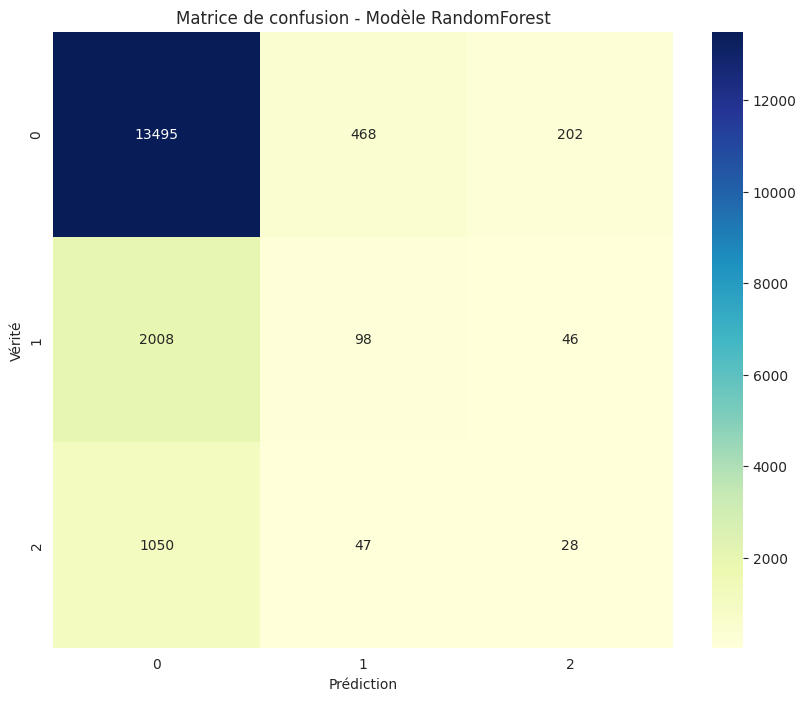

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'DistanceCategory']].copy()
y = df_selectionne['ArrDelayCategory'].copy()

# Créer une instance de OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Sélectionner les colonnes catégorielles
categorical_columns = ['Reporting_Airline', 'Origin', 'Dest']

# Encoder les colonnes catégorielles
one_hot_encoded = encoder.fit_transform(X[categorical_columns])

# Créer un DataFrame à partir de la matrice encodée
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=X.index)

# Supprimer les colonnes catégorielles originales
X = X.drop(columns=categorical_columns)

# Concaténer le DataFrame encodé avec le DataFrame original
X = pd.concat([X, one_hot_encoded_df], axis=1)


# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculer les poids des classes
weights = len(y) / (3 * np.bincount(y))
class_weights = {i: weights[i] for i in range(3)}

# Créer et entraîner le modèle de classification Random Forest
classifier = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 3), yticklabels=range(0, 3))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()

en utilisant le sous-échantillonnage et le sur-échantillonnage (SMOTE) 

Précision: 0.7303634904254099

Rapport de classification:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     14165
           1       0.13      0.09      0.11      2152
           2       0.11      0.07      0.08      1125

    accuracy                           0.73     17442
   macro avg       0.35      0.35      0.35     17442
weighted avg       0.69      0.73      0.71     17442



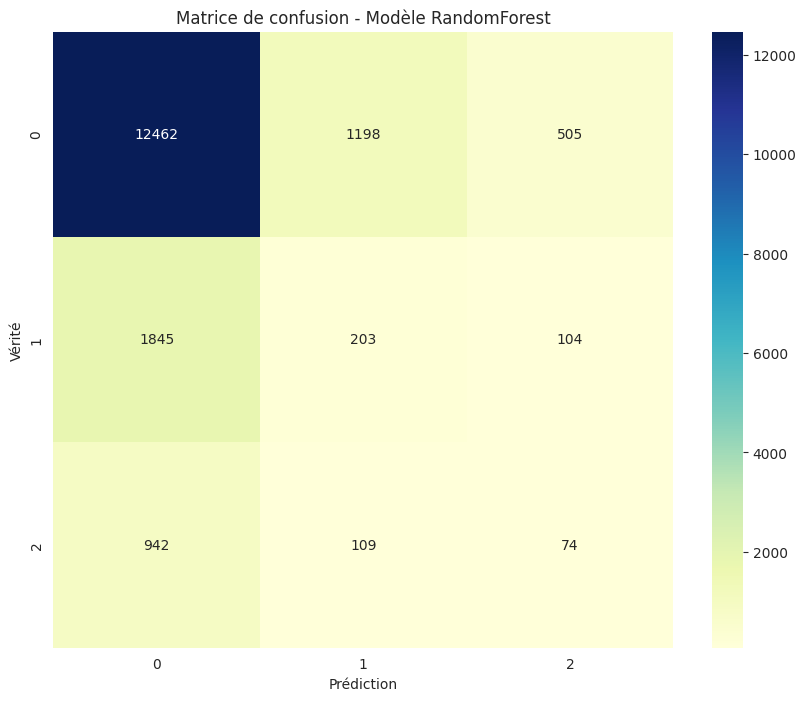

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Définir les étapes de sous-échantillonnage et sur-échantillonnage
over = SMOTE(sampling_strategy={1: int(len(y)*0.3), 2: int(len(y)*0.3)})
under = RandomUnderSampler(sampling_strategy={0: int(len(y)*0.4)})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Appliquer le pipeline aux données d'entraînement
X_res, y_res = pipeline.fit_resample(X_train, y_train)

# Entraîner le modèle de classification Random Forest sur les nouvelles données
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_res, y_res)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 3), yticklabels=range(0, 3))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()

hyperparamètres 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle de classification Random Forest
classifier = RandomForestClassifier(random_state=42)

# Définir la recherche de grille
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Exécuter la recherche de grille
grid_search.fit(X_res, y_res)

# Obtenir le meilleur modèle
best_grid = grid_search.best_estimator_

# Prédire les catégories de retard pour l'ensemble de test
y_pred = best_grid.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 3), yticklabels=range(0, 3))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()


Fitting 3 folds for each of 216 candidates, totalling 648 fits


PCA

Variance expliquée par chaque composant principal:
 [7.50906869e-03 6.76280318e-03 6.27225841e-03 6.19486653e-03
 6.14171871e-03 6.00451803e-03 5.89306450e-03 5.88325763e-03
 5.83727370e-03 5.50949164e-03 5.26066488e-03 5.21579235e-03
 4.99687665e-03 4.91998490e-03 4.88411608e-03 4.71137412e-03
 4.56281358e-03 4.39858788e-03 4.37249993e-03 4.36143489e-03
 4.32258550e-03 4.29428376e-03 4.28892989e-03 4.27913539e-03
 4.25716329e-03 4.21955920e-03 4.20660532e-03 4.20402929e-03
 4.15641740e-03 4.15074749e-03 4.14577343e-03 4.14107276e-03
 4.13722272e-03 4.12512484e-03 4.12308245e-03 4.12221810e-03
 4.12067249e-03 4.11856766e-03 4.11147762e-03 4.11007453e-03
 4.10494063e-03 4.10425974e-03 4.10302607e-03 4.10198598e-03
 4.10084176e-03 4.10043791e-03 4.09972428e-03 4.09870435e-03
 4.09792667e-03 4.09570111e-03 4.09513409e-03 4.09425178e-03
 4.09366868e-03 4.09336803e-03 4.09248959e-03 4.09216439e-03
 4.08985242e-03 4.08870582e-03 4.08828495e-03 4.08757720e-03
 4.08744941e-03 4.08626016e-03 4.

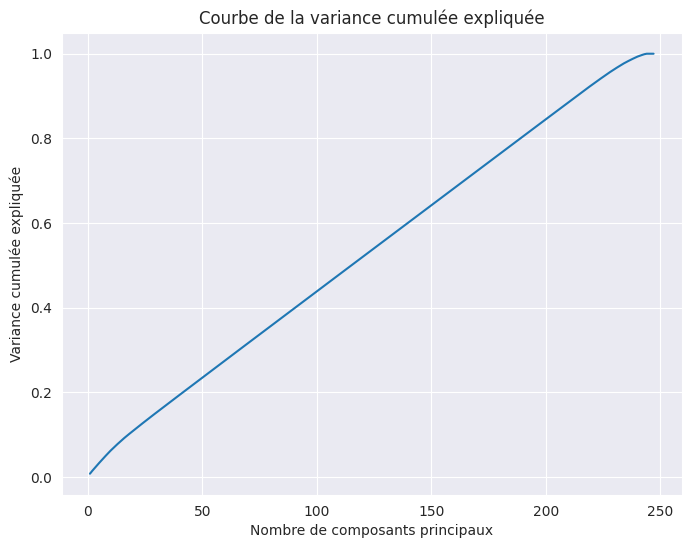

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normaliser les features avant d'appliquer PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA
pca = PCA()  # Sans spécifier n_components, PCA conserve toutes les composantes
X_pca = pca.fit_transform(X_scaled)

# Afficher la variance expliquée par chaque composant principal
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composant principal:\n", explained_variance)

# Afficher la variance cumulée expliquée
cumulative_explained_variance = np.cumsum(explained_variance)
print("\nVariance cumulée expliquée:\n", cumulative_explained_variance)

# Vous pouvez également visualiser la variance expliquée
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_explained_variance)
plt.xlabel('Nombre de composants principaux')
plt.ylabel('Variance cumulée expliquée')
plt.title('Courbe de la variance cumulée expliquée')
plt.show()

AdaBoost pour créer un ensemble de classificateurs Random Forest. AdaBoost fonctionne en adaptant les poids des observations en fonction des erreurs de prédiction précédentes. Il augmente le poids des observations mal classées et diminue le poids de celles correctement classées.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Créer le classificateur AdaBoost
adb_classifier = AdaBoostClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42),
    n_estimators=100,
    random_state=42
)

# Entraîner le modèle AdaBoost sur les nouvelles données
adb_classifier.fit(X_res, y_res)

# Prédire les catégories de retard pour l'ensemble de test
y_pred_adb = adb_classifier.predict(X_test_pca)

# Calculer la précision et afficher le rapport de classification
accuracy_adb = accuracy_score(y_test, y_pred_adb)
report_adb = classification_report(y_test, y_pred_adb)

print(f"Précision AdaBoost: {accuracy_adb}")
print("\nRapport de classification AdaBoost:\n", report_adb)

# Calculer la matrice de confusion
cm_adb = confusion_matrix(y_test, y_pred_adb)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_adb, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 3), yticklabels=range(0, 3))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle AdaBoost')
plt.show()